In [54]:
# Parse data
import os
import yaml

data_folder = "nanomap_final"
trial_name = "drift_bias_01"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)

def crawl_dir_and_plot(fullpath):
    print fullpath
    modeled_data_actual = []
    modeled_data_modeled = []
    modeled_data_robustness = []

    unmodeled_data_actual = []
    unmodeled_data_modeled = []
    unmodeled_data_robustness = []
    
    def Plot():
        plt.scatter(unmodeled_data_actual, unmodeled_data_robustness,label='unmodeled')
        plt.scatter(modeled_data_actual, modeled_data_robustness,label='modeled', color='r')
        axes = plt.gca()
        #axes.set_xlim([0,50])
        axes.set_ylim([0,3])
        plt.legend()

    def ParseMetadata(name):
        with open(name) as f:
            # use safe_load instead load
            metadata = yaml.safe_load(f)
        if metadata['tag'] == 'modeled':
            modeled_data_actual.append(metadata['drift_actual'])
            modeled_data_modeled.append(metadata['sigma_modeled'])
            modeled_data_robustness.append(metadata['min_range_to_obstacle'])
        if metadata['tag'] == 'unmodeled':
            unmodeled_data_actual.append(metadata['drift_actual'])
            unmodeled_data_modeled.append(metadata['sigma_modeled'])
            unmodeled_data_robustness.append(metadata['min_range_to_obstacle'])


    for root, dirs, files_list in os.walk(fullpath):
        for name in files_list:
             if name.startswith(("metadata")):
                    ParseMetadata(os.path.join(root,name))
    Plot()

                

In [55]:
# Make plot

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_bias_01


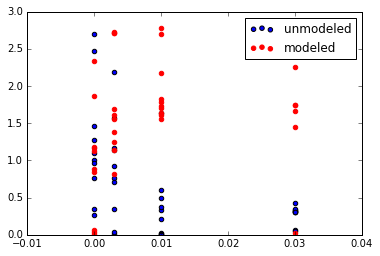

In [56]:
data_folder = "nanomap_final"
trial_name = "drift_bias_01"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_imu_02


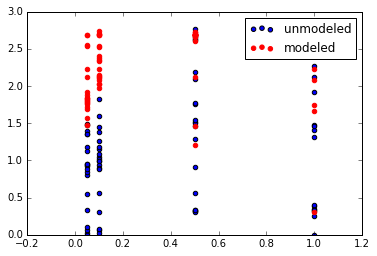

In [59]:
data_folder = "nanomap_final"
trial_name = "drift_imu_02"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

In [ ]:
data_folder = "nanomap_final"
trial_name = "drift_imu_01"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)